### Different types of missing data-
#### 1. Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.



In [1]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df[df['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


#### Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [5]:
import numpy as np
df['deck_null'] = np.where(df['deck'].isnull(),1,0)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_null
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [6]:
## find percentage of missing values
df['deck_null'].mean()

0.7721661054994389

In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'deck_null'],
      dtype='object')

In [8]:
df.groupby(['survived'])['deck_null'].mean()

survived
0    0.877960
1    0.602339
Name: deck_null, dtype: float64

#### Missing at random(MAR)

Men--> hide their salary \
Women---> hide their age

### All the techniques of handling missing values
1. Mean/median/Mode replacement
2. Random sample imputation
3. Capturing NAN values with a new feature
4. End of distribution imputation
5. Arbitrary imputation
6. frequent categories imputation


##### Mean/ Median imputation
when should we apply? Mean/Median imputation has the assumption that the data are missing completely at random(MCAR).
We solve this by the NAN with the most frequent occurance of the variables

In [9]:
import pandas as pd
df = pd.read_csv('/Users/abhisheksingh/Desktop/DATA_SCIENCE/Feature_Engineering/titanic.csv',usecols=['age','fare','survived'])

In [10]:
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.isnull().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [12]:
def impute_nan(df,variable,median):
    df[f"{variable}_median"]  = df[variable].fillna(median)
    return df[f"{variable}_median"]

In [13]:
median = df.age.median()
median

28.0

In [14]:
impute_nan(df,'age',median)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age_median, Length: 891, dtype: float64

In [15]:
df.head()

,survived,age,fare,age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

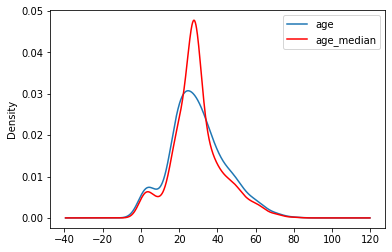

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df.age_median.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels)

### Advantages and Disadvantages of Mean/median imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. faster way to obtain the complete dataset
#### Disadvantages
1. Change or distortion in the original variance
2. impacts correlation

#### Random sample imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

when should it be used? it assumes that the data are missing completely at random(MCAR)

In [18]:
df=pd.read_csv('titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df.isnull().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [20]:
df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: age, Length: 177, dtype: float64

In [21]:
df['age'].dropna().sample()

373    22.0
Name: age, dtype: float64

In [22]:
def impute_nan(df,variable,median):
    df[f"{variable}_median"]  = df[variable].fillna(median)
    df[f"{variable}_random"] = df[variable]
    ## it will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [23]:
impute_nan(df,'age',median)

In [24]:
df.head(10)

,survived,age,fare,age_median,age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


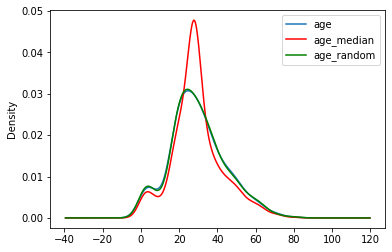

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.age.plot(kind='kde',ax=ax)
df.age_median.plot(kind='kde',ax=ax,color='red')
df.age_random.plot(kind='kde',ax=ax,color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels)

##### Advantages
1. Easy to implemented 
2. there is less distortion inn variance

##### Disadvantages
1. every situation it won't work

### capturing nan values with a new feature
it works well if the data are not missing completely at random


In [26]:
df=pd.read_csv('titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
import numpy as np
df['age_nan'] = np.where(df['age'].isnull(),1,0)

In [28]:
df.head(20)

,survived,age,fare,age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [29]:
df['age'].fillna(df.age.median(),inplace=True)

In [30]:
df.head(20)

,survived,age,fare,age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


##### Advantages
1. Easy to implement
2. captures the importance of missing values

##### Disadvantages
1. creatung additional features(curse of dimensionality)

#### End of Distribution imputation

In [31]:
df=pd.read_csv('titanic.csv',usecols=['age','fare','survived'])
df.head()


,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot: >

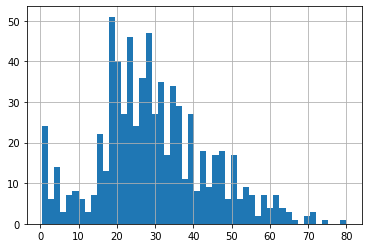

In [32]:
df.age.hist(bins=50)

In [33]:
extreme = df.age.mean()+3*df.age.std()

<AxesSubplot: xlabel='age'>

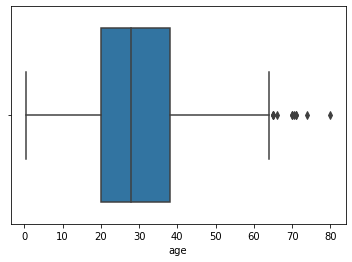

In [34]:
import seaborn as sns
sns.boxplot(x='age',data=df)

In [35]:
def impute_nan(df,variable,median,extreme):
    df[f"{variable}_end_dist"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [36]:
impute_nan(df,'age',median,extreme)

In [37]:
df.head()

,survived,age,fare,age_end_dist
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


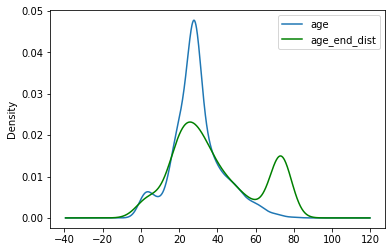

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.age.plot(kind='kde',ax=ax)
df.age_end_dist.plot(kind='kde',ax=ax,color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels)

<AxesSubplot: >

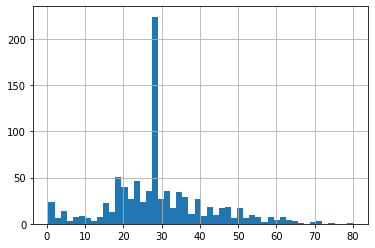

In [39]:
df['age'].hist(bins=50)

<AxesSubplot: >

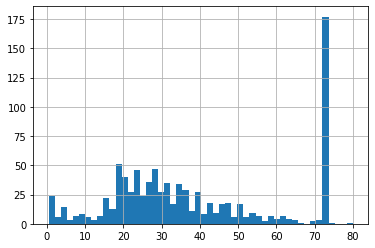

In [40]:
df['age_end_dist'].hist(bins=50)

<AxesSubplot: xlabel='age_end_dist'>

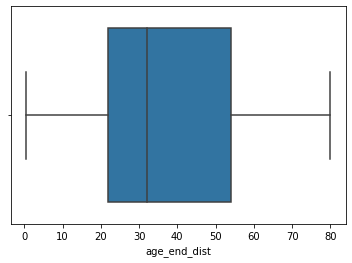

In [41]:
sns.boxplot(x='age_end_dist',data=df)

#### Arbitrary value imputation

this technique was derived from kaggle competition it consists of replacing NAN by an arbitrary value

In [42]:
df=pd.read_csv("titanic.csv",usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot: >

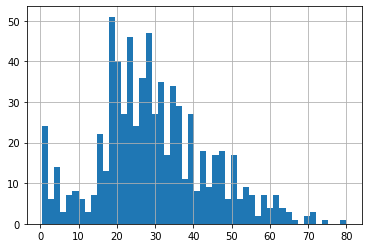

In [43]:
df['age'].hist(bins=50)

In [44]:
def impute_nan(df,variable):
    df[f"{variable}_zero"] = df[variable].fillna(0)
    df[f"{variable}_hundreds"] = df[variable].fillna(100)

In [45]:
impute_nan(df,'age')

In [46]:
df.head(20)

,survived,age,fare,age_zero,age_hundreds
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


##### Advantages
1. Easy to implement
2. Captures the importance of missingess if there is one
##### Disadvantages
3. Distorts the original distribution of the variable
4. If missingess is not important, it may mask the predictive power of the original variable by distorting
its distribution
5. Hard to decide which value to use


##### How To Handle Categroical Missing Values
##### Frequent Category Imputation

In [47]:
df= pd.read_csv('../EDA/house-prices-advanced-regression-techniques/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [48]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [49]:
df.isnull().sum().sort_values(ascending=False)

FireplaceQu    690
GarageType      81
BsmtQual        37
SalePrice        0
dtype: int64

In [50]:
print(f"{df.isnull().mean().sort_values(ascending=False)*100}")

FireplaceQu    47.260274
GarageType      5.547945
BsmtQual        2.534247
SalePrice       0.000000
dtype: float64


##### Compute the frequency with every feature

<AxesSubplot: xlabel='BsmtQual'>

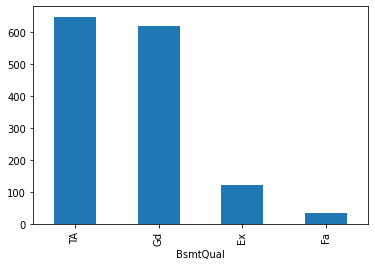

In [52]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot: >

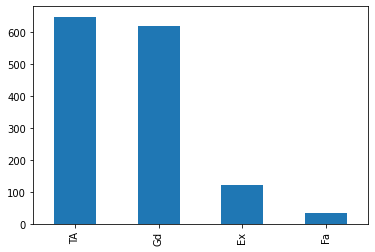

In [53]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot: >

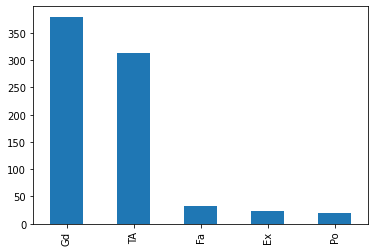

In [54]:
df['FireplaceQu'].value_counts().plot.bar()

<AxesSubplot: >

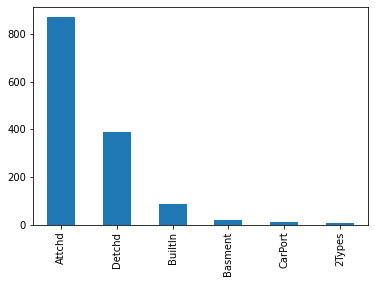

In [55]:
df['GarageType'].value_counts().plot.bar()

In [56]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [60]:
df['GarageType'].mode()[0]

'Attchd'

In [57]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [58]:
for features in ['FireplaceQu','GarageType','BsmtQual']:
    impute_nan(df,features)

In [59]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

##### Advantages
1. Easy to implement 
2. Faster way to implement
##### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over represented way, if there are many nan's
2. it distorts the relation of the most frequent label

#### Adding a variable to capture NAN

In [73]:
df= pd.read_csv('../EDA/house-prices-advanced-regression-techniques/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [74]:
import numpy as np
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [75]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [76]:
frequent = df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(frequent,inplace=True)

In [77]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [78]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [79]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


Suppose if you have more frequent categories, we just replace NAN with a new category


In [80]:
df= pd.read_csv('../EDA/house-prices-advanced-regression-techniques/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [84]:
def impute_nan(df,variable):
    df[f"{variable}Var"] = np.where(df[variable].isnull(),"Missing",df[variable])

In [85]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [86]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualVar,FireplaceQuVar,GarageTypeVar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [89]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [90]:
df.head()

,SalePrice,BsmtQualVar,FireplaceQuVar,GarageTypeVar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
